# DSCI 100
## Group 71 Project Final Report
### Name: Wanqing Hu, Anders Mirabee, Ivan To, Queenie Wu
### Title: Optimal Raisin Classification

### Introduction

Made from dried grapes, raisins are one of the most popular fruit snacks in the world due to their nutritional values being rich in antioxidants, fiber and more (Kenellos et. al 2017). There are over 1200 varieties of raisins that originated and are grown in Turkey, and it has been difficult to distinguish the varieties as black raisins look similar in their sizes, colour and texture. Recent research has developed various classification methods to determine the exact raisin variety based on processed images under controlled studies (Starke and Atalaysun 2015). This dataset is based on research by Çinar et al., where they developed a machine vision system to differentiate between Kecimen and Besni varieties from a total of 900 raisins (2020). Our project makes use of this raisin dataset to develop a classification model based on the K-nearest neighbors classification algorithm. Each data point includes measurements of seven morphological features: area (number of pixels taken up by the raisin), perimeter, long axis length, short axis length, eccentricity (how elliptical the raisin is), convex area (number of pixels on the smallest convex shell of the raisin), and the extent (ratio of convex area to area). Our question is: What is the most accurate combination of three morphological variables for predicting whether a raisin is of the Besni or Kecimen varieties? And what is the estimated accuracy and actual accuracy of this combination? To build our classification model, a section of this dataset will retain its class variable and will be used as training data, while another section will have its class variable removed and the algorithm will be used to predict its raisin varieties. These predictions will then be compared to the original class variables to determine a success rate. Based on the comparison, we will pick three of the predictors that yield the highest estimated accuracy to make our classification model reliable.

### Methods & Results

In [21]:
library(tidyverse)
library(readxl)
library(tidymodels)
set.seed(9999)

The first thing we did was import the data into R. We used the ```download.file``` function to download the data from the internet as a Microsoft Excel file, then loaded the data into R by using the ```read_excel``` function. Because the “Class” variable was originally of type character, we converted the column type into a factor. 

In [22]:
url <- "https://drive.google.com/uc?export=download&id=1pKzE4p8GnA2vgtbdyBAsOXOWsFu2QAV9"
download.file(url, "raisin.xlsx")
raisin <- read_excel("raisin.xlsx") |>
mutate(Class = as_factor(Class))
head(raisin)

Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
87524,442.2460,253.2912,0.8197384,90546,0.7586506,1184.040,Kecimen
75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
90856,442.2670,266.3283,0.7983536,93717,0.6376128,1208.575,Kecimen
45928,286.5406,208.7600,0.6849892,47336,0.6995994,844.162,Kecimen
79408,352.1908,290.8275,0.5640113,81463,0.7927719,1073.251,Kecimen
49242,318.1254,200.1221,0.7773513,51368,0.6584564,881.836,Kecimen


This data is already in a tidy format because each row is a single observation; each column is a single variable and every cell contains only one value. Due to the imported data already being in a tidy format, we went straight to splitting the data into a training set and a testing set. Below, we split the data using 75% for training and 25% for testing. Using the ```initial_split``` function in R shuffled the data, and then split it so that the ratio of Kecimen to Besni class that already existed in the original data are the same in the split data. This prevents too much of one class in a split, potentially influencing the result of our classifier. 

In [23]:
raisin_split <- initial_split(raisin, prop = 0.75, strata = Class)
raisin_train <- training(raisin_split)
raisin_test <- testing(raisin_split)
head(raisin_train)

Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
137583,649.5415,273.2603,0.9072011,142650,0.7316377,1590.354,Besni
117592,533.2929,288.5583,0.8409660,123587,0.7300677,1432.006,Besni
95546,487.1783,251.9602,0.8558749,99166,0.7227820,1276.807,Besni
96582,446.7052,278.3255,0.7821716,100113,0.7065976,1216.979,Besni
61409,403.7013,209.3659,0.8550074,67286,0.5973929,1083.477,Besni
134303,600.7663,288.3849,0.8772529,138133,0.7424362,1497.515,Besni


Then, we summarized the data in one table and found the average of each of the variables. This is done so that we can plot these values in a boxplot, showing the spread of all the values. 

In [24]:
mean_all_variables <- raisin_train |>
select(-Class) |>
map_df(mean)
mean_all_variables

Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
87434.34,429.7509,253.5999,0.7821323,90793.85,0.6992206,1161.997


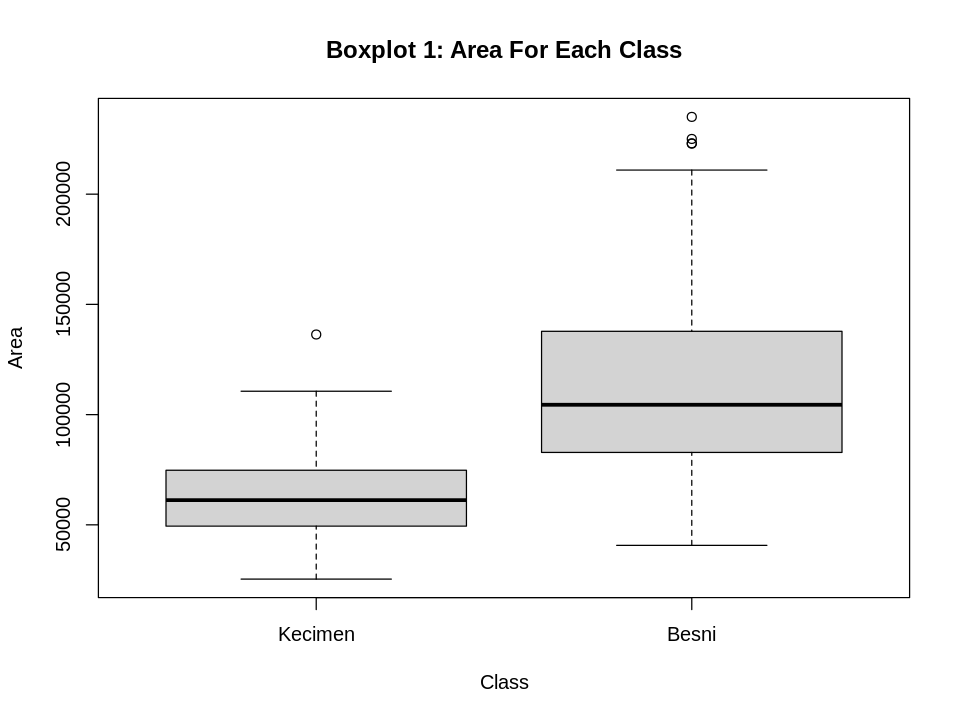

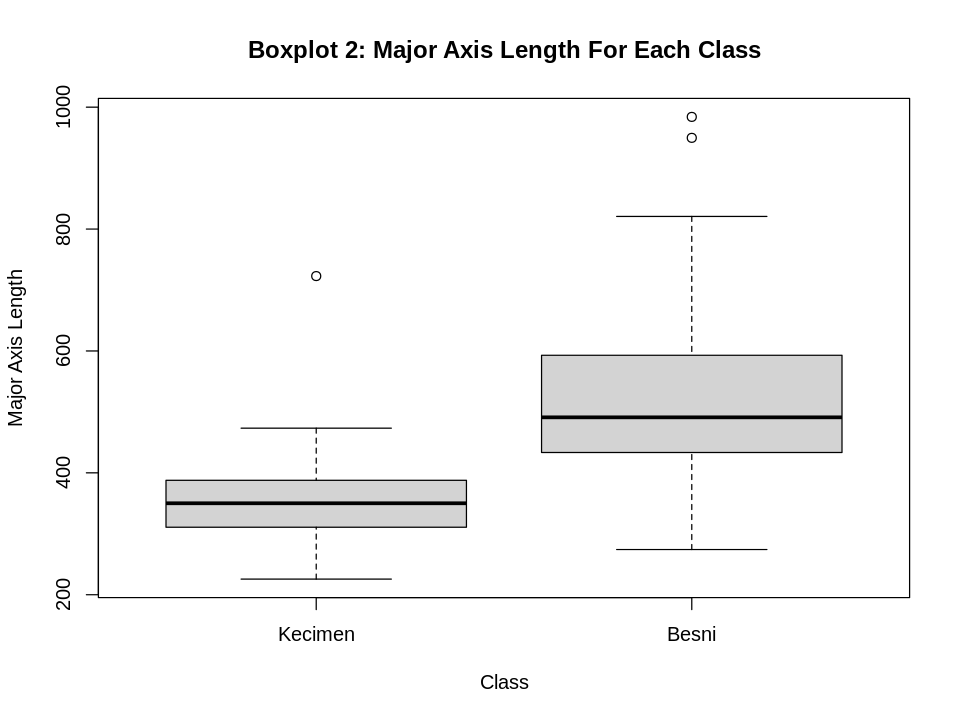

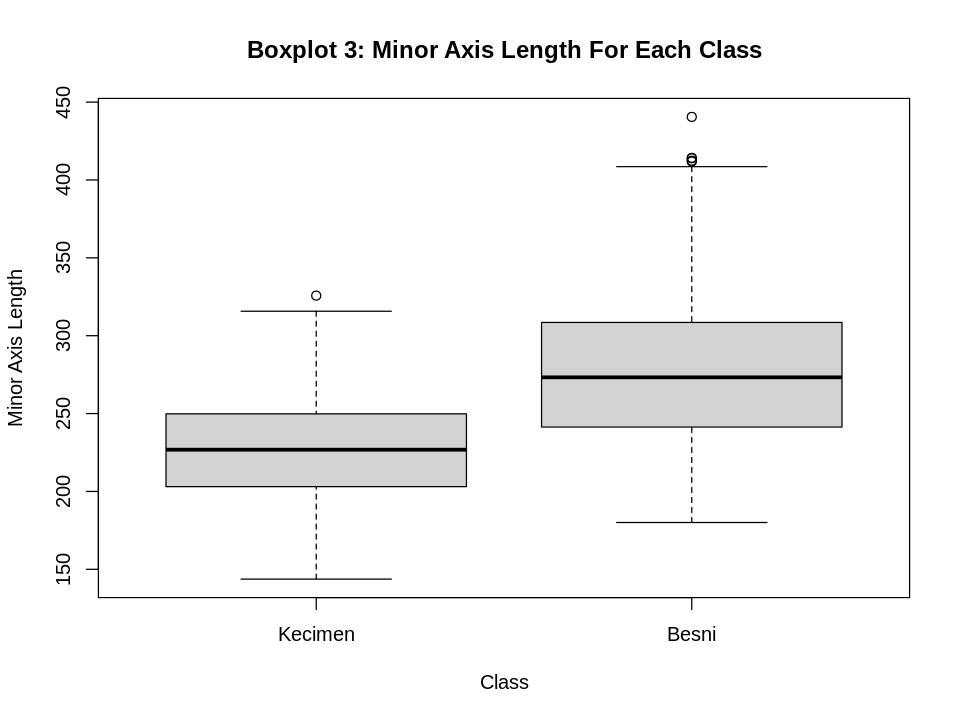

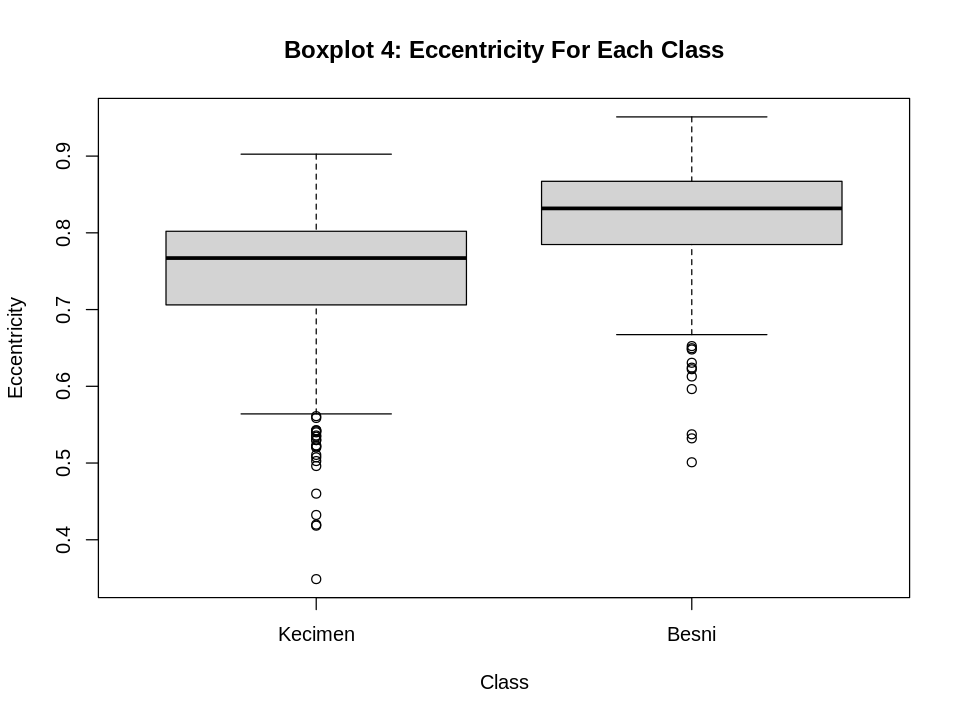

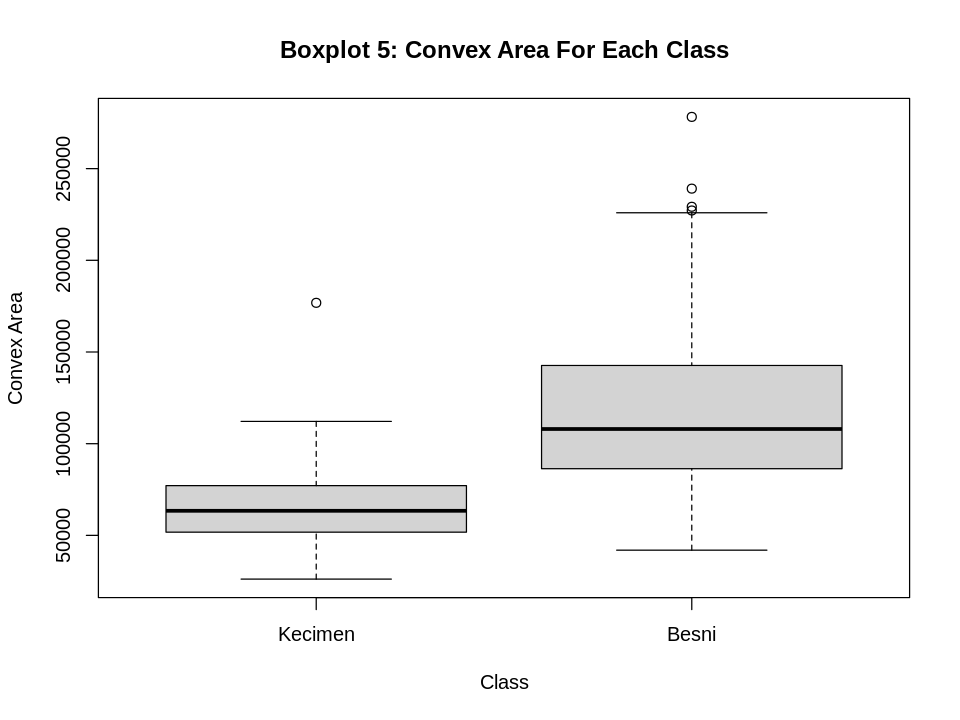

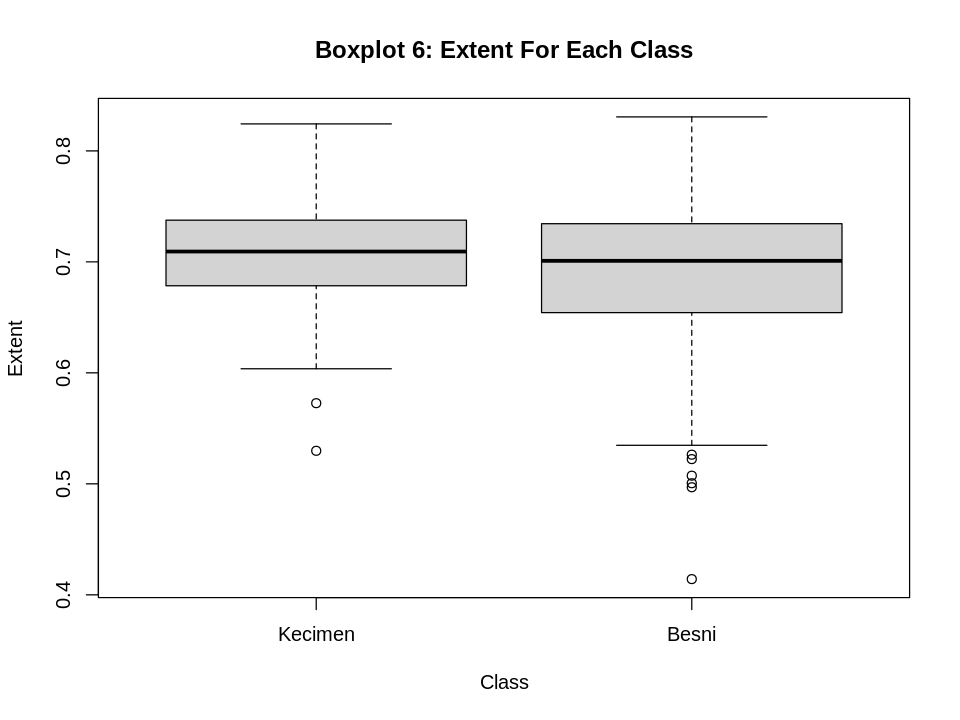

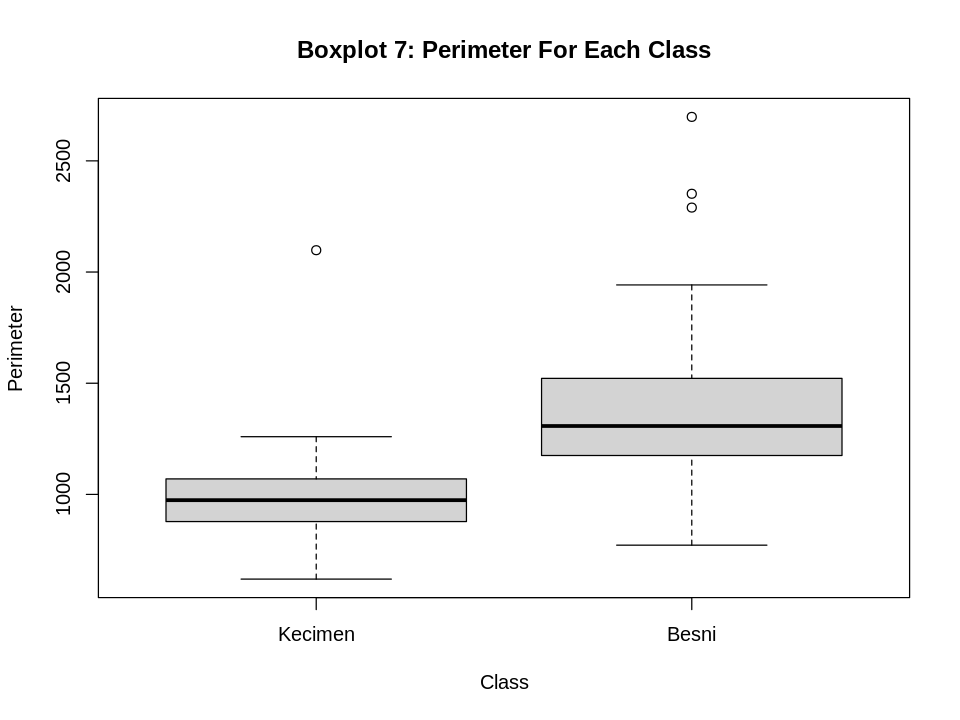

In [25]:
options(repr.plot.width = 8, repr.plot.height = 6)
area_boxplot <- boxplot(Area ~ Class, 
                        data = raisin_train, 
                        main = "Boxplot 1: Area For Each Class",
                        xlab = "Class",
                        ylab = "Area")
major_axis_length_boxplot <- boxplot(MajorAxisLength ~ Class, 
                        data = raisin_train, 
                        main = "Boxplot 2: Major Axis Length For Each Class",
                        xlab = "Class",
                        ylab = "Major Axis Length")
minor_axis_length_boxplot <- boxplot(MinorAxisLength ~ Class, 
                        data = raisin_train, 
                        main = "Boxplot 3: Minor Axis Length For Each Class",
                        xlab = "Class",
                        ylab = "Minor Axis Length")
eccentricity_boxplot <- boxplot(Eccentricity ~ Class, 
                        data = raisin_train, 
                        main = "Boxplot 4: Eccentricity For Each Class",
                        xlab = "Class",
                        ylab = "Eccentricity")
convex_area_boxplot <- boxplot(ConvexArea ~ Class, 
                        data = raisin_train, 
                        main = "Boxplot 5: Convex Area For Each Class",
                        xlab = "Class",
                        ylab = "Convex Area")
extent_boxplot <- boxplot(Extent ~ Class, 
                        data = raisin_train, 
                        main = "Boxplot 6: Extent For Each Class",
                        xlab = "Class",
                        ylab = "Extent")
perimeter_boxplot <- boxplot(Perimeter ~ Class, 
                        data = raisin_train, 
                        main = "Boxplot 7: Perimeter For Each Class",
                        xlab = "Class",
                        ylab = "Perimeter")

With the seven box plots, we compared the values and distributions of each variable between the two classes of raisins. If there was significant overlap between the plot distributions of the two raisin varieties for a variable, it meant that there was a lot of similarity in values between the two, deeming the use of this variable ineffective in our classifier. The classifier would most likely not be able to differentiate between the two raisin varieties using this variable as a predictor. Hence, for our classifier, we chose variables with only slight overlap to decide which combination of variables would be best to use as our predictors. 

The boxplots above indicate that "Area", "MajorAxisLength", "MinorAxisLength", "ConvexArea", "Perimeter" are the variables that don't show much overlap for the two classes, so we will pick these five variables as our predictors.

In [26]:
train_cols_needed <- raisin_train |>
select(Area, MajorAxisLength, MinorAxisLength, ConvexArea, Perimeter, Class)
head(train_cols_needed)

Area,MajorAxisLength,MinorAxisLength,ConvexArea,Perimeter,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
137583,649.5415,273.2603,142650,1590.354,Besni
117592,533.2929,288.5583,123587,1432.006,Besni
95546,487.1783,251.9602,99166,1276.807,Besni
96582,446.7052,278.3255,100113,1216.979,Besni
61409,403.7013,209.3659,67286,1083.477,Besni
134303,600.7663,288.3849,138133,1497.515,Besni


We are looking to choose the best parameter K to use in our classifier that gives us the highest accuracy, and thus, we need to compare the classifier’s performance for different values of K with the different combinations of predictor variables. We will do this by first using the ```vfold_cv``` function. We performed a 10-fold cross-validation in R. This means that our training data was split into 10 even chunks, using 1 chunk as the validation set and the rest as the training set. 

Next, we created a data frame with a ```neighbors``` variable that contained K values to try with our classifier. Our data frame contains ```neighbors``` values from 26 to 54, stepping by 2. 

For our first combination of three predictors, ```Area + MajorAxisLength + MinorAxisLength```, we created a recipe. This specifies the ```Class``` variable is our target variable and that the three predictor variables are our predictors. Then, we scaled and centered all our predictors so that they have a mean of 0 and a standard deviation of 1. 

We then created a model specification using the ```nearest_neighbor``` function. Because we are looking for the best K to use, we will have to tune our model,  setting ```neighbors = tune()``` instead of giving a particular value. For performing K-nearest neighbors classification, we use the ```kknn``` package in R, as well as using the ```set_mode``` function to specify that this model is a classification problem. 

Finally, for this first set of predictors, we need to put it all together in a workflow. We add the recipe and the model, then we use the ```tune_grid``` function to fit the model for each value in the range of K we specified in the ```gridvals``` data frame we created earlier. By using the ```collect_metrics``` function, we can find the result of our classifier’s validation accuracy across the folds. Filtering the ```accuracy``` row out of the ```.metric``` column will allow us to plot this on a line graph, showing us which value of K gives us the best estimated accuracy. Because we are determining the best combination of predictors, we must do this same process for the 9 other different combinations as well. 

In [27]:
raisin_vfold <- vfold_cv(train_cols_needed, v = 10, strata = Class)
gridvals <- tibble(neighbors = seq(from = 26, to = 54, by = 2))

##1st combination of the three predictors: Area + MajorAxisLength + MinorAxisLength

##Recipe
recipe_area_major_minor <- recipe(Class ~ Area + MajorAxisLength + MinorAxisLength, data = train_cols_needed) |>
step_center(all_predictors()) |>
step_scale(all_predictors())

##Model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")

results_area_major_minor <- workflow() |>
add_recipe(recipe_area_major_minor) |>
add_model(knn_spec) |>
tune_grid(resamples = raisin_vfold, grid = gridvals) |>
collect_metrics() |>
filter(.metric == "accuracy")

In [28]:
##2nd combination of the three predictors: Area + MajorAxisLength + ConvexArea

recipe_area_major_convex <- recipe(Class ~ Area + MajorAxisLength + ConvexArea, data = train_cols_needed) |>
step_center(all_predictors()) |>
step_scale(all_predictors())

results_area_major_convex <- workflow() |>
add_recipe(recipe_area_major_convex) |>
add_model(knn_spec) |>
tune_grid(resamples = raisin_vfold, grid = gridvals) |>
collect_metrics() |>
filter(.metric == "accuracy")

In [29]:
##3rd combination of the three predictors: Area + MajorAxisLength + Perimeter

recipe_area_major_perim <- recipe(Class ~ Area + MajorAxisLength + Perimeter, data = train_cols_needed) |>
step_center(all_predictors()) |>
step_scale(all_predictors())

results_area_major_perim <- workflow() |>
add_recipe(recipe_area_major_perim) |>
add_model(knn_spec) |>
tune_grid(resamples = raisin_vfold, grid = gridvals) |>
collect_metrics() |>
filter(.metric == "accuracy")

In [30]:
##4th combination of the three predictors: Area + MinorAxisLength + ConvexArea
recipe_area_minor_convex <- recipe(Class ~ Area + MinorAxisLength + ConvexArea, data = train_cols_needed) |>
step_center(all_predictors()) |>
step_scale(all_predictors())

results_area_minor_convex <- workflow() |>
add_recipe(recipe_area_minor_convex) |>
add_model(knn_spec) |>
tune_grid(resamples = raisin_vfold, grid = gridvals) |>
collect_metrics() |>
filter(.metric == "accuracy")

In [31]:
##5th combination of the three predictors: Area + MinorAxisLength + Perimeter
recipe_area_minor_perim <- recipe(Class ~ Area + MinorAxisLength + Perimeter, data = train_cols_needed) |>
step_center(all_predictors()) |>
step_scale(all_predictors())

results_area_minor_perim <- workflow() |>
add_recipe(recipe_area_minor_perim) |>
add_model(knn_spec) |>
tune_grid(resamples = raisin_vfold, grid = gridvals) |>
collect_metrics() |>
filter(.metric == "accuracy")

In [32]:
##6th combination of the three predictors: Area + ConvexArea + Perimeter
recipe_area_convex_perim <- recipe(Class ~ Area + ConvexArea + Perimeter, data = train_cols_needed) |>
step_center(all_predictors()) |>
step_scale(all_predictors())

results_area_convex_perim <- workflow() |>
add_recipe(recipe_area_convex_perim) |>
add_model(knn_spec) |>
tune_grid(resamples = raisin_vfold, grid = gridvals) |>
collect_metrics() |>
filter(.metric == "accuracy")

In [33]:
##7th combination of the three predictors: MajorAxisLength + MinorAxisLength + ConvexArea

recipe_major_minor_convex <- recipe(Class ~ MajorAxisLength + MinorAxisLength + ConvexArea, data = train_cols_needed) |>
step_center(all_predictors()) |>
step_scale(all_predictors())

results_major_minor_convex <- workflow() |>
add_recipe(recipe_major_minor_convex) |>
add_model(knn_spec) |>
tune_grid(resamples = raisin_vfold, grid = gridvals) |>
collect_metrics() |>
filter(.metric == "accuracy")

In [34]:
##8th combination of the three predictors: MajorAxisLength + MinorAxisLength + Perimeter

recipe_major_minor_perim <- recipe(Class ~ MajorAxisLength + MinorAxisLength + Perimeter, data = train_cols_needed) |>
step_center(all_predictors()) |>
step_scale(all_predictors())

results_major_minor_perim <- workflow() |>
add_recipe(recipe_major_minor_perim) |>
add_model(knn_spec) |>
tune_grid(resamples = raisin_vfold, grid = gridvals) |>
collect_metrics() |>
filter(.metric == "accuracy")

In [35]:
##9th combination of the three predictors: MajorAxisLength + ConvexArea + Perimeter

recipe_major_convex_perim <- recipe(Class ~ MajorAxisLength + ConvexArea + Perimeter, data = train_cols_needed) |>
step_center(all_predictors()) |>
step_scale(all_predictors())

results_major_convex_perim <- workflow() |>
add_recipe(recipe_major_convex_perim) |>
add_model(knn_spec) |>
tune_grid(resamples = raisin_vfold, grid = gridvals) |>
collect_metrics() |>
filter(.metric == "accuracy")

In [36]:
##10th combination of the three predictors: MinorAxisLength + ConvexArea + Perimeter

recipe_minor_convex_perim <- recipe(Class ~ MinorAxisLength + ConvexArea + Perimeter, data = train_cols_needed) |>
step_center(all_predictors()) |>
step_scale(all_predictors())

results_minor_convex_perim <- workflow() |>
add_recipe(recipe_minor_convex_perim) |>
add_model(knn_spec) |>
tune_grid(resamples = raisin_vfold, grid = gridvals) |>
collect_metrics() |>
filter(.metric == "accuracy")

By using the ```bind_rows``` function, we can bind together multiple data frames and then plot the estimated accuracy versus the number of neighbors for each combination of predictors on the same plot. 

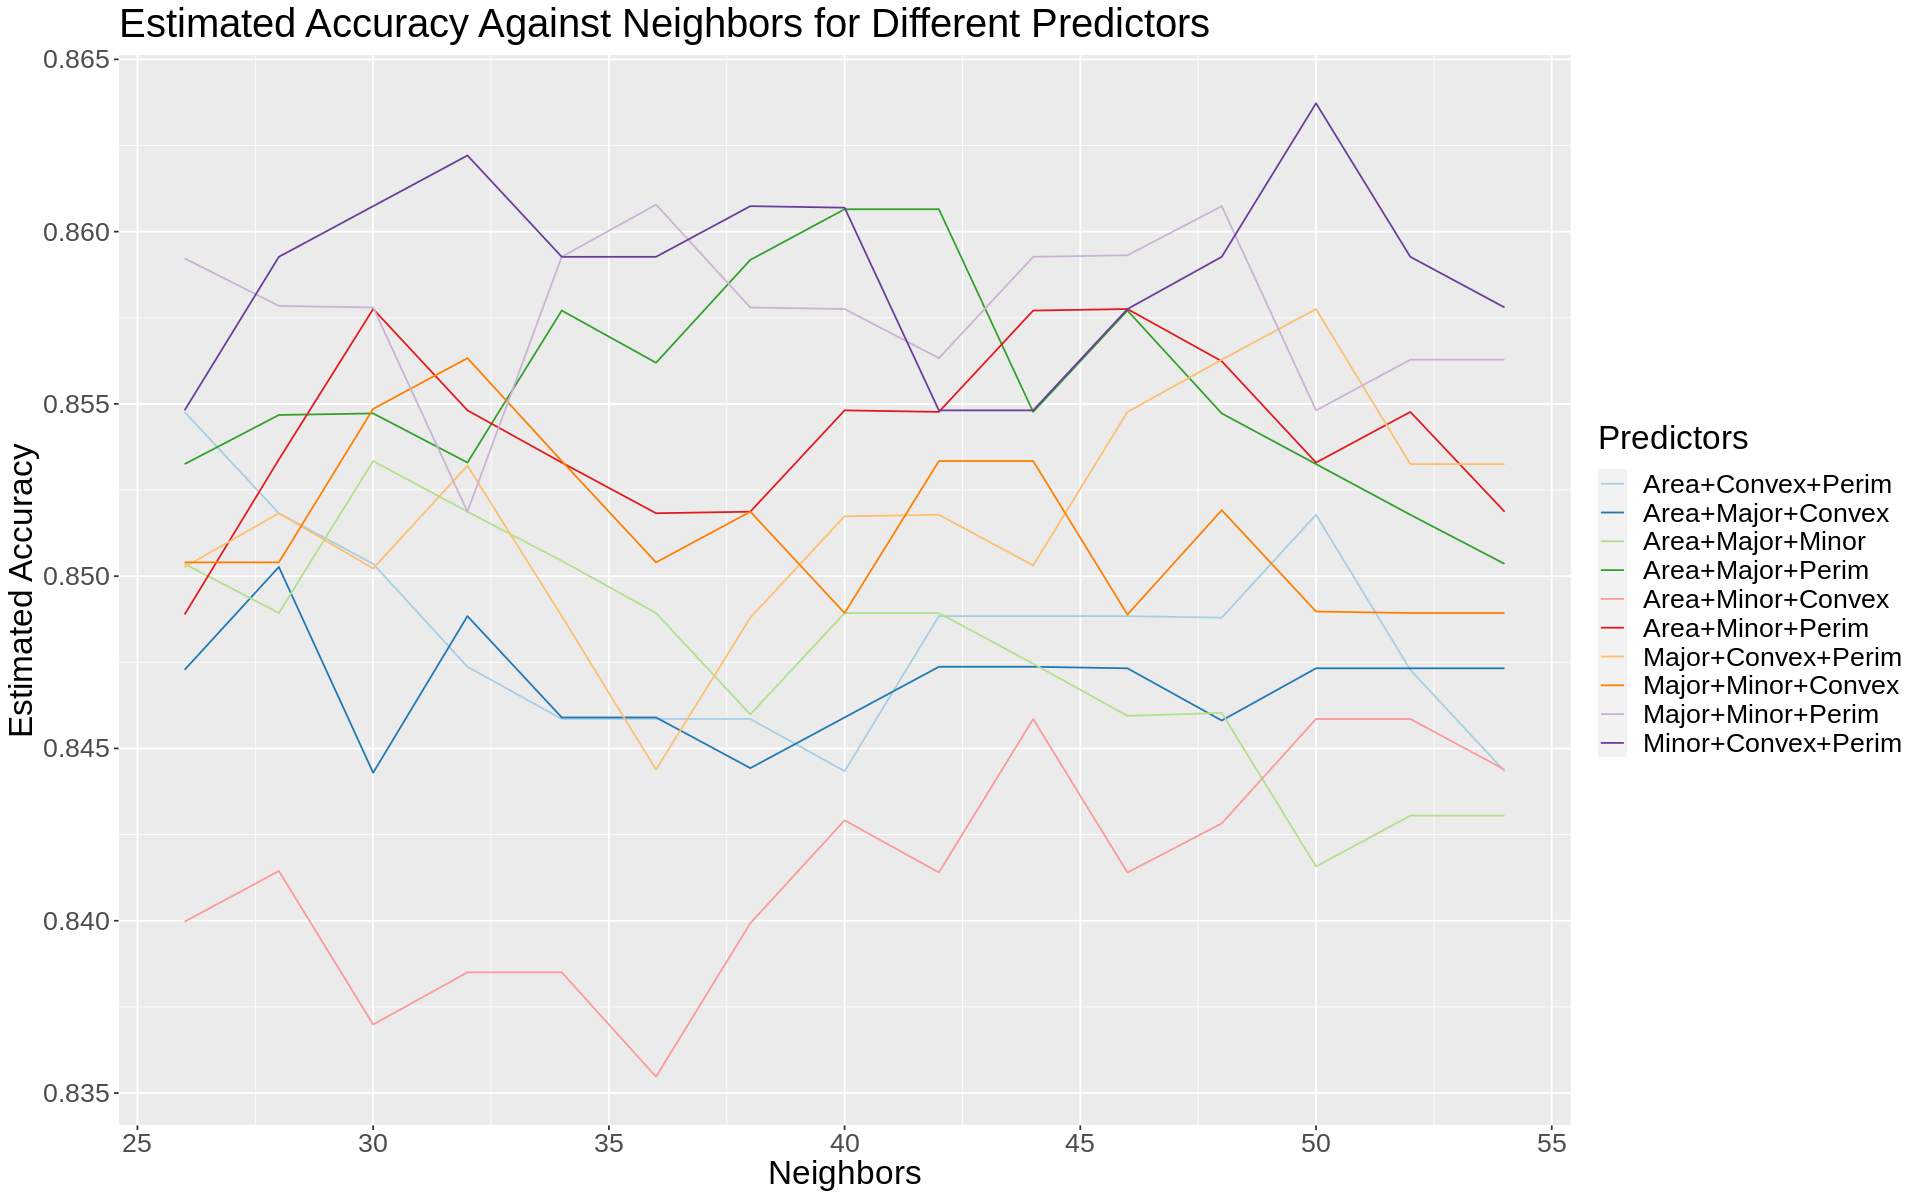

In [37]:
labels_area_major_minor <- results_area_major_minor |>
mutate(predictors = "Area+Major+Minor")

labels_area_major_convex <- results_area_major_convex |>
mutate(predictors = "Area+Major+Convex")

labels_area_major_perim <- results_area_major_perim |>
mutate(predictors = "Area+Major+Perim")

labels_area_minor_convex <- results_area_minor_convex |>
mutate(predictors = "Area+Minor+Convex")

labels_area_minor_perim <- results_area_minor_perim |>
mutate(predictors = "Area+Minor+Perim")

labels_area_convex_perim <- results_area_convex_perim |>
mutate(predictors = "Area+Convex+Perim")

labels_major_minor_convex <- results_major_minor_convex |>
mutate(predictors = "Major+Minor+Convex")

labels_major_minor_perim <- results_major_minor_perim |>
mutate(predictors = "Major+Minor+Perim")

labels_major_convex_perim <- results_major_convex_perim |>
mutate(predictors = "Major+Convex+Perim")

labels_minor_convex_perim <- results_minor_convex_perim |>
mutate(predictors = "Minor+Convex+Perim")

all_with_labels <- bind_rows(labels_area_major_minor, labels_area_major_convex, labels_area_major_perim,
                             labels_area_minor_convex, labels_area_minor_perim, labels_area_convex_perim,
                             labels_major_minor_convex, labels_major_minor_perim, labels_major_convex_perim,
                             labels_minor_convex_perim)

options(repr.plot.width = 16, repr.plot.height = 10)
acc_vs_k <- ggplot(all_with_labels, aes(x = neighbors, y = mean, color = predictors)) +
geom_line() +
labs(x = "Neighbors", y = "Estimated Accuracy", color = "Predictors") +
ggtitle("Estimated Accuracy Against Neighbors for Different Predictors") +
theme(text = element_text(size = 20)) +
scale_color_brewer(palette = "Paired")
acc_vs_k

In [38]:
results_minor_convex_perim |>
filter(mean == max(mean))

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
50,accuracy,binary,0.8637255,10,0.01237665,Preprocessor1_Model13


As seen in the above plot, the highest peak is given by the predictors ```MinorAxisLength +ConvexArea + Perimeter```. In particular, the highest estimated accuracy of 86.37% is given by this combination at K = 50. We will now use this K value to build our final model.

First, we created a new model specification. We will create this the same way we created the model specification for earlier, but set ```neighbors = 50``` instead of using ```tune()```. 

We then created our workflow by adding the recipe, the final model specification, and retraining the classifier by fitting the whole workflow on the training data using the ```fit``` function. 

Next, we use the ```predict``` function to fit our model on the testing data. We use the ```bind_cols``` function to add the column of predictions made to the original test data- ```.pred_class``` contains the predicted raisin variety while ```Class``` contains the true raisin variety. 

Finally, we use the ```metrics``` function to compute the accuracy of our model, specifying that ```truth = Class``` and that the classifier estimate was ```.pred_class```. We filter out for ```accuracy``` and find that the accuracy of our classifier is 85.84%.

In [39]:
##We will use the 10th combination of predictors (MinorAxisLength + ConvexArea + Perimeter) to build our final model with k = 50.

final_model <- nearest_neighbor(weight_func = "rectangular", neighbors = 50) |>
set_engine("kknn") |>
set_mode("classification")

knn_fit <- workflow() |>
add_recipe(recipe_minor_convex_perim) |>
add_model(final_model) |>
fit(data = train_cols_needed)

##Fit the model to our testing data and see the prediction accuracy based on this model:

raisin_test_predictions <- predict(knn_fit, raisin_test) |>
bind_cols(raisin_test)
head(raisin_test_predictions)

raisin_test_acc <- raisin_test_predictions |>
metrics(truth = Class, estimate = .pred_class) |>
filter(.metric == "accuracy")
raisin_test_acc

.pred_class,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Besni,87524,442.2460,253.2912,0.8197384,90546,0.7586506,1184.040,Kecimen
Kecimen,75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
Kecimen,64380,366.9648,227.7716,0.7840556,66125,0.6643757,981.544,Kecimen
Kecimen,43441,276.6108,201.8131,0.6838823,45133,0.6908556,803.748,Kecimen
Kecimen,69726,354.1769,252.5292,0.7011610,71849,0.7343985,1035.501,Kecimen
Kecimen,57346,330.4784,222.4437,0.7395550,59365,0.7236088,928.272,Kecimen


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8584071


We can see that the second highest peak is at K = 32 in the plot of estimated accuracy against neighbors for different values of K. This peak is given by the same set of predictors, ```MinorAxisLength + ConvexArea + Perimeter```. We will build another model, using K = 32 instead of K = 50 to see if the accuracy of the classifier will be higher with this model. 

In [40]:
final_model_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = 32) |>
set_engine("kknn") |>
set_mode("classification")

knn_fit_2 <- workflow() |>
add_recipe(recipe_minor_convex_perim) |>
add_model(final_model_2) |>
fit(data = train_cols_needed)

raisin_test_predictions_2 <- predict(knn_fit_2, raisin_test) |>
bind_cols(raisin_test)

raisin_test_acc_2 <- raisin_test_predictions_2 |>
metrics(truth = Class, estimate = .pred_class) |>
filter(.metric == "accuracy")
raisin_test_acc_2

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8628319


The actual accuracy with K = 32 is 86.2832%, higher than that with K = 50. 

### Discussion

We found that - using three morphological variables - our algorithm yields an accuracy rating of approximately 86% when predicting whether a raisin belongs to the Besni or Kecimen varieties. The three variables in question are minor axis length, convex area, and perimeter, which were selected due to their large degree of contrast between Besni and Kecimen raisins. In Besni raisins, minor axis length ranges from 180 to 440 pixels, whereas in Kecimen raisins, it ranges from 144 to 326 pixels. Furthermore, in Besni raisins, convex areas range from 41,924 to 278,217 pixels, while in Kecimen raisins, they range from 26,139 to 176,818 pixels. Additionally, Besni raisins' perimeters range from 772 to 2,698 pixels, while the corresponding range for Kecimen raisins is 619 to 2,098 pixels.

With the significant dichotomy of the above variables in mind, we predicted that our algorithm would have an accuracy rate significantly above the random probability of success, which is 50% since there are 113 of each Besni and Kecimen raisins within our testing dataset. We also predicted that our algorithm would have an accuracy rate significantly below 100% due to all three predictor variables having noticeable ranges of overlap between the two classes of raisins (minor axis lengths overlap from 180 to 326 pixels, convex areas overlap from 41,924 to 176,818 pixels, and perimeters overlap from 772 to 2,098 pixels). Thus, since our accuracy result of 86% is both significantly above 50% and significantly below 100%, our results fit our expectations.

Practical uses for this algorithm or one like it include commercial applications (e.g., to sell raisins by weight; this is especially useful if one variety of raisin is more expensive than the other) or scientific research (e.g., sequencing raisin genomes to inform agricultural practices for better yield of produce). However, while an accuracy rate of 86% may be sufficient for the former use, it could result in a great deal of scientific error in the latter use. In such a case, it may be best to use a more complex algorithm which takes into consideration more than three morphological variables, which raises the question of how much one, two, or three additional variables would contribute to raising the accuracy score of the algorithm.

### References

Çinar, İ., Koklu, M., & Taşdemi̇R, Ş. (2020). Kuru Üzüm Tanelerinin Makine Görüşü ve Yapay Zeka Yöntemleri Kullanılarak Sınıflandırılması. Gazi Journal of Engineering Sciences, 6(3), 200–209. https://doi.org/10.30855/gmbd.2020.03.03

Kanellos, P. T., Kaliora, A. C., Tentolouris, N. K., Argiana, V., Perrea, D., Kalogeropoulos, N., Kountouri, A. M., & Karathanos, V. T. (2014). A pilot, randomized controlled trial to examine the health outcomes of raisin consumption in patients with diabetes. Nutrition, 30(3), 358–364. https://doi.org/10.1016/j.nut.2013.07.020

Starke, Y., & Atalaysun, M. (n.d.). Turkey Raisin Annual Turkey Annual Raisin Report. 5.